#Importing Dataset

#Importing libraries

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
import os

files = os.listdir('data')

# Print the list of files
print("Files in the folder:")
for file in files:
    print(file)


Files in the folder:
0
1
.ipynb_checkpoints
validation


#Data Preprocessing

##Training Image preprocessing

In [26]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3119 files belonging to 36 classes.


##Validation Image Preprocessing

In [27]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'data/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [28]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [33]:
cnn.add(tf.keras.layers.Flatten())

In [34]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [35]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [37]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [38]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [46]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


2024-02-04 18:27:53.572687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 44s - loss: 123.7970 - accuracy: 0.0312    

2024-02-04 18:27:55.987493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 43.5850 - accuracy: 0.0409

2024-02-04 18:27:57.993419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:58.036766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:58.051928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:58.434870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 17s - loss: 21.5176 - accuracy: 0.0323

2024-02-04 18:28:02.314381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 16s - loss: 20.9196 - accuracy: 0.0323

2024-02-04 18:28:02.573056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 15s - loss: 19.8367 - accuracy: 0.0322

2024-02-04 18:28:02.809396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 14s - loss: 18.4437 - accuracy: 0.0330

2024-02-04 18:28:03.353878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:03.360818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 13s - loss: 17.2703 - accuracy: 0.0345

2024-02-04 18:28:03.917192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:04.037593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 15.6787 - accuracy: 0.0349

2024-02-04 18:28:04.903383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:04.944980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 11s - loss: 15.1412 - accuracy: 0.0361

2024-02-04 18:28:05.170971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:05.370783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 13.7816 - accuracy: 0.0355

2024-02-04 18:28:06.235991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 9s - loss: 13.3966 - accuracy: 0.0360

2024-02-04 18:28:06.679778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 12.5504 - accuracy: 0.0372

2024-02-04 18:28:07.693438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 10.9089 - accuracy: 0.0339

2024-02-04 18:28:10.010596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:10.194715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 9.7027 - accuracy: 0.0324

2024-02-04 18:28:13.052913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


97/98 [============================>.] - ETA: 0s - loss: 8.9456 - accuracy: 0.0316

2024-02-04 18:28:14.621924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:14.624904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 25s 228ms/step - loss: 8.9199 - accuracy: 0.0314 - val_loss: 3.5823 - val_accuracy: 0.0313
Epoch 2/32


2024-02-04 18:28:18.062559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 40s - loss: 3.5812 - accuracy: 0.0156 

2024-02-04 18:28:20.474402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 3.5814 - accuracy: 0.0433

2024-02-04 18:28:22.497333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:22.538247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:22.560310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:22.951665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 17s - loss: 3.5824 - accuracy: 0.0312

2024-02-04 18:28:26.828368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 16s - loss: 3.5825 - accuracy: 0.0312

2024-02-04 18:28:27.106904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 15s - loss: 3.5824 - accuracy: 0.0312

2024-02-04 18:28:27.350848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 14s - loss: 3.5823 - accuracy: 0.0321

2024-02-04 18:28:27.893842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:27.900991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 13s - loss: 3.5820 - accuracy: 0.0312

2024-02-04 18:28:28.476839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:28.594316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.5816 - accuracy: 0.0298

2024-02-04 18:28:29.516821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:29.583148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 12s - loss: 3.5816 - accuracy: 0.0298

2024-02-04 18:28:29.809693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 11s - loss: 3.5816 - accuracy: 0.0319

2024-02-04 18:28:30.020210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.5810 - accuracy: 0.0355

2024-02-04 18:28:30.891536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 9s - loss: 3.5812 - accuracy: 0.0360 

2024-02-04 18:28:31.365580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 3.5803 - accuracy: 0.0366

2024-02-04 18:28:32.434396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.5813 - accuracy: 0.0352

2024-02-04 18:28:34.778545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:34.959459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.5802 - accuracy: 0.0357

2024-02-04 18:28:37.876777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.5804 - accuracy: 0.0359

2024-02-04 18:28:39.475887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:39.479108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 25s 233ms/step - loss: 3.5804 - accuracy: 0.0359 - val_loss: 3.5758 - val_accuracy: 0.0370
Epoch 3/32


2024-02-04 18:28:43.009110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 39s - loss: 3.5852 - accuracy: 0.0469 

2024-02-04 18:28:45.406579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 18s - loss: 3.5655 - accuracy: 0.0553

2024-02-04 18:28:47.417230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:47.454208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:47.470022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:47.869217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 17s - loss: 3.5756 - accuracy: 0.0458

2024-02-04 18:28:51.740280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 16s - loss: 3.5739 - accuracy: 0.0500

2024-02-04 18:28:52.013556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 15s - loss: 3.5746 - accuracy: 0.0479

2024-02-04 18:28:52.270391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 14s - loss: 3.5746 - accuracy: 0.0455

2024-02-04 18:28:52.827927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:52.839332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 13s - loss: 3.5730 - accuracy: 0.0469

2024-02-04 18:28:53.387381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:53.514571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.5737 - accuracy: 0.0436

2024-02-04 18:28:54.390777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:54.440957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 11s - loss: 3.5739 - accuracy: 0.0437

2024-02-04 18:28:54.699669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 11s - loss: 3.5727 - accuracy: 0.0448

2024-02-04 18:28:54.912442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.5703 - accuracy: 0.0466

2024-02-04 18:28:55.837210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 9s - loss: 3.5699 - accuracy: 0.0472 

2024-02-04 18:28:56.296671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 3.5691 - accuracy: 0.0453

2024-02-04 18:28:57.389611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.5689 - accuracy: 0.0445

2024-02-04 18:28:59.812083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:28:59.997540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.5699 - accuracy: 0.0426

2024-02-04 18:29:02.922431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.5719 - accuracy: 0.0410

2024-02-04 18:29:04.505576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:04.509182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 25s 233ms/step - loss: 3.5719 - accuracy: 0.0410 - val_loss: 3.5692 - val_accuracy: 0.0370
Epoch 4/32


2024-02-04 18:29:07.978607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 39s - loss: 3.5573 - accuracy: 0.0312 

2024-02-04 18:29:10.377386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 18s - loss: 3.5729 - accuracy: 0.0361

2024-02-04 18:29:12.399117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:12.439408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:12.453380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:12.865042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 17s - loss: 3.5676 - accuracy: 0.0458

2024-02-04 18:29:16.777512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 16s - loss: 3.5683 - accuracy: 0.0427

2024-02-04 18:29:17.048568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.5662 - accuracy: 0.0420

2024-02-04 18:29:17.309868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.5654 - accuracy: 0.0420

2024-02-04 18:29:17.881127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:17.887961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.5652 - accuracy: 0.0419

2024-02-04 18:29:18.474578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:18.581765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.5658 - accuracy: 0.0407

2024-02-04 18:29:19.474393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:19.524534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 12s - loss: 3.5654 - accuracy: 0.0417

2024-02-04 18:29:19.757160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:19.951319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.5643 - accuracy: 0.0411

2024-02-04 18:29:20.863470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.5615 - accuracy: 0.0430

2024-02-04 18:29:21.337549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 3.5609 - accuracy: 0.0436

2024-02-04 18:29:22.407304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.5591 - accuracy: 0.0436

2024-02-04 18:29:24.811370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:25.000626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.5594 - accuracy: 0.0437

2024-02-04 18:29:27.969555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.5571 - accuracy: 0.0439

2024-02-04 18:29:29.547536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:29.551582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 25s 234ms/step - loss: 3.5571 - accuracy: 0.0439 - val_loss: 3.5488 - val_accuracy: 0.0570
Epoch 5/32


2024-02-04 18:29:33.067599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 40s - loss: 3.5339 - accuracy: 0.0625 

2024-02-04 18:29:35.499545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 3.5525 - accuracy: 0.0312

2024-02-04 18:29:37.530814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:37.574127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:37.591528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:37.988657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 17s - loss: 3.5451 - accuracy: 0.0312

2024-02-04 18:29:41.896963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 16s - loss: 3.5459 - accuracy: 0.0323

2024-02-04 18:29:42.163235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.5411 - accuracy: 0.0352

2024-02-04 18:29:42.426958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.5406 - accuracy: 0.0357

2024-02-04 18:29:42.989027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:43.002613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.5412 - accuracy: 0.0378

2024-02-04 18:29:43.567336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:43.692793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.5395 - accuracy: 0.0407

2024-02-04 18:29:44.597833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:44.653479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 12s - loss: 3.5386 - accuracy: 0.0419

2024-02-04 18:29:44.886422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 11s - loss: 3.5373 - accuracy: 0.0462

2024-02-04 18:29:45.117663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.5296 - accuracy: 0.0478

2024-02-04 18:29:46.034146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.5255 - accuracy: 0.0483

2024-02-04 18:29:46.504062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 3.5265 - accuracy: 0.0463

2024-02-04 18:29:47.552810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.5237 - accuracy: 0.0502

2024-02-04 18:29:49.999562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:50.190920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.5333 - accuracy: 0.0500

2024-02-04 18:29:53.166926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.5327 - accuracy: 0.0494

2024-02-04 18:29:54.745209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:29:54.747206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 25s 235ms/step - loss: 3.5327 - accuracy: 0.0494 - val_loss: 3.4896 - val_accuracy: 0.0798
Epoch 6/32


2024-02-04 18:29:58.269379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 41s - loss: 3.5533 - accuracy: 0.0312 

2024-02-04 18:30:00.683052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 3.5134 - accuracy: 0.0505

2024-02-04 18:30:02.725098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:02.766841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:02.787401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:03.189733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 18s - loss: 3.5100 - accuracy: 0.0502

2024-02-04 18:30:07.160417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 17s - loss: 3.5118 - accuracy: 0.0531

2024-02-04 18:30:07.437008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.5088 - accuracy: 0.0527

2024-02-04 18:30:07.691056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.5094 - accuracy: 0.0571

2024-02-04 18:30:08.288940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:08.300059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.5071 - accuracy: 0.0617

2024-02-04 18:30:08.869430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:08.998358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.5079 - accuracy: 0.0647

2024-02-04 18:30:09.921002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:09.973141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 12s - loss: 3.5083 - accuracy: 0.0646

2024-02-04 18:30:10.218196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:10.421469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.5110 - accuracy: 0.0625

2024-02-04 18:30:11.337874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.5140 - accuracy: 0.0643

2024-02-04 18:30:11.807960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 3.5029 - accuracy: 0.0673

2024-02-04 18:30:12.909198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.5062 - accuracy: 0.0634

2024-02-04 18:30:15.365687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:15.560500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.5042 - accuracy: 0.0636

2024-02-04 18:30:18.566786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.5043 - accuracy: 0.0641

2024-02-04 18:30:20.155963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:20.158670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 25s 237ms/step - loss: 3.5043 - accuracy: 0.0641 - val_loss: 3.4611 - val_accuracy: 0.1083
Epoch 7/32


2024-02-04 18:30:23.642300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 44s - loss: 3.4360 - accuracy: 0.0312 

2024-02-04 18:30:26.057968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 3.4953 - accuracy: 0.0553

2024-02-04 18:30:28.112422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:28.155152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:28.170317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:28.570251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 18s - loss: 3.4719 - accuracy: 0.0725

2024-02-04 18:30:32.534882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 17s - loss: 3.4680 - accuracy: 0.0740

2024-02-04 18:30:32.806647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.4585 - accuracy: 0.0762

2024-02-04 18:30:33.077224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.4660 - accuracy: 0.0741

2024-02-04 18:30:33.649118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:33.658010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.4678 - accuracy: 0.0724

2024-02-04 18:30:34.250260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:34.373272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.4613 - accuracy: 0.0727

2024-02-04 18:30:35.296494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:35.356762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 12s - loss: 3.4622 - accuracy: 0.0717

2024-02-04 18:30:35.583982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 12s - loss: 3.4563 - accuracy: 0.0734

2024-02-04 18:30:35.796197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.4536 - accuracy: 0.0711

2024-02-04 18:30:36.741183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.4558 - accuracy: 0.0702

2024-02-04 18:30:37.225678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 3.4591 - accuracy: 0.0695

2024-02-04 18:30:38.345542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.4642 - accuracy: 0.0673

2024-02-04 18:30:40.814938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:41.011735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.4544 - accuracy: 0.0702

2024-02-04 18:30:44.052850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


97/98 [============================>.] - ETA: 0s - loss: 3.4514 - accuracy: 0.0725

2024-02-04 18:30:45.647619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:45.650981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 26s 239ms/step - loss: 3.4520 - accuracy: 0.0725 - val_loss: 3.3725 - val_accuracy: 0.1481
Epoch 8/32


2024-02-04 18:30:49.163761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 42s - loss: 3.6123 - accuracy: 0.0781 

2024-02-04 18:30:51.574238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 3.5594 - accuracy: 0.0649

2024-02-04 18:30:53.641344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:53.681301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:53.696811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:54.114504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 18s - loss: 3.5369 - accuracy: 0.0625

2024-02-04 18:30:58.084996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 17s - loss: 3.5346 - accuracy: 0.0635

2024-02-04 18:30:58.365005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.5262 - accuracy: 0.0654

2024-02-04 18:30:58.630738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.5246 - accuracy: 0.0688

2024-02-04 18:30:59.206356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:59.214482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.5225 - accuracy: 0.0724

2024-02-04 18:30:59.805369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:30:59.929775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.5160 - accuracy: 0.0719

2024-02-04 18:31:00.848700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:00.901500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 12s - loss: 3.5143 - accuracy: 0.0710

2024-02-04 18:31:01.134631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 12s - loss: 3.5110 - accuracy: 0.0707

2024-02-04 18:31:01.339857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.5094 - accuracy: 0.0705

2024-02-04 18:31:02.269130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.5049 - accuracy: 0.0702

2024-02-04 18:31:02.749844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 8s - loss: 3.4965 - accuracy: 0.0711

2024-02-04 18:31:03.836329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.4887 - accuracy: 0.0726

2024-02-04 18:31:06.304882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:06.498273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.4786 - accuracy: 0.0743

2024-02-04 18:31:09.532869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.4648 - accuracy: 0.0769

2024-02-04 18:31:11.152123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:11.155706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 26s 239ms/step - loss: 3.4648 - accuracy: 0.0769 - val_loss: 3.4020 - val_accuracy: 0.1111
Epoch 9/32


2024-02-04 18:31:14.691216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 40s - loss: 3.3666 - accuracy: 0.0781 

2024-02-04 18:31:17.108935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 3.4660 - accuracy: 0.0721

2024-02-04 18:31:19.166151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:19.205355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:19.230727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:19.634849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 17s - loss: 3.4965 - accuracy: 0.0625

2024-02-04 18:31:23.639197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 17s - loss: 3.4973 - accuracy: 0.0615

2024-02-04 18:31:23.928172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.4916 - accuracy: 0.0625

2024-02-04 18:31:24.224800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.4884 - accuracy: 0.0670

2024-02-04 18:31:24.799123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:24.805436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.4719 - accuracy: 0.0724

2024-02-04 18:31:25.398160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:25.521102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.4753 - accuracy: 0.0698

2024-02-04 18:31:26.446646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:26.500744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 12s - loss: 3.4729 - accuracy: 0.0701

2024-02-04 18:31:26.734966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 12s - loss: 3.4666 - accuracy: 0.0707

2024-02-04 18:31:26.948920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.4600 - accuracy: 0.0692

2024-02-04 18:31:27.884122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.4486 - accuracy: 0.0731

2024-02-04 18:31:28.350570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 9s - loss: 3.4526 - accuracy: 0.0733

2024-02-04 18:31:29.458784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.4528 - accuracy: 0.0761

2024-02-04 18:31:32.006646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:32.194872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.4416 - accuracy: 0.0776

2024-02-04 18:31:35.255083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.4329 - accuracy: 0.0811

2024-02-04 18:31:36.848725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:36.853062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 26s 240ms/step - loss: 3.4329 - accuracy: 0.0811 - val_loss: 3.3312 - val_accuracy: 0.1197
Epoch 10/32


2024-02-04 18:31:40.392910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 48s - loss: 3.5013 - accuracy: 0.0781 

2024-02-04 18:31:42.869763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 20s - loss: 3.4316 - accuracy: 0.0817

2024-02-04 18:31:44.926485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:44.981111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:44.989964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:45.401072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 18s - loss: 3.3936 - accuracy: 0.0927

2024-02-04 18:31:49.417480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 17s - loss: 3.3918 - accuracy: 0.0927

2024-02-04 18:31:49.724953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.3891 - accuracy: 0.0928

2024-02-04 18:31:49.976463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.3746 - accuracy: 0.0946

2024-02-04 18:31:50.545105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:50.554302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.3801 - accuracy: 0.0938

2024-02-04 18:31:51.171006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:51.303211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 13s - loss: 3.3755 - accuracy: 0.0945

2024-02-04 18:31:52.234645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:52.274547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 12s - loss: 3.3782 - accuracy: 0.0938

2024-02-04 18:31:52.517687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 12s - loss: 3.3805 - accuracy: 0.0924

2024-02-04 18:31:52.737683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.3711 - accuracy: 0.0944

2024-02-04 18:31:53.673487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.3675 - accuracy: 0.0943

2024-02-04 18:31:54.149528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 9s - loss: 3.3635 - accuracy: 0.0975

2024-02-04 18:31:55.270333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 6s - loss: 3.3579 - accuracy: 0.1043

2024-02-04 18:31:57.752934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:31:57.941872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.3677 - accuracy: 0.1022

2024-02-04 18:32:00.994740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.3533 - accuracy: 0.1052

2024-02-04 18:32:02.605102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:02.608743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 26s 242ms/step - loss: 3.3533 - accuracy: 0.1052 - val_loss: 3.1426 - val_accuracy: 0.1909
Epoch 11/32


2024-02-04 18:32:06.187245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 40s - loss: 3.3956 - accuracy: 0.0938 

2024-02-04 18:32:08.612902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 19s - loss: 3.3547 - accuracy: 0.0913

2024-02-04 18:32:10.688643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:10.730639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:10.750866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:11.153381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 18s - loss: 3.3759 - accuracy: 0.0893

2024-02-04 18:32:15.133922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 17s - loss: 3.3646 - accuracy: 0.0917

2024-02-04 18:32:15.423030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 16s - loss: 3.3572 - accuracy: 0.0957

2024-02-04 18:32:15.691572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 15s - loss: 3.3536 - accuracy: 0.0964

2024-02-04 18:32:16.264272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:16.274518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 14s - loss: 3.3567 - accuracy: 0.0929

2024-02-04 18:32:16.895091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:17.014619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 12s - loss: 3.3542 - accuracy: 0.0945

2024-02-04 18:32:17.965643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:18.018781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 12s - loss: 3.3491 - accuracy: 0.0958

2024-02-04 18:32:18.254454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 12s - loss: 3.3499 - accuracy: 0.0965

2024-02-04 18:32:18.470563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 10s - loss: 3.3357 - accuracy: 0.0999

2024-02-04 18:32:19.377916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 10s - loss: 3.3309 - accuracy: 0.1002

2024-02-04 18:32:19.865133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 9s - loss: 3.3225 - accuracy: 0.1051

2024-02-04 18:32:20.967599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 3.3068 - accuracy: 0.1158

2024-02-04 18:32:23.453939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:23.645817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 2s - loss: 3.2908 - accuracy: 0.1235

2024-02-04 18:32:26.703839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.2711 - accuracy: 0.1289

2024-02-04 18:32:28.310596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:28.314442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 26s 240ms/step - loss: 3.2711 - accuracy: 0.1289 - val_loss: 2.8956 - val_accuracy: 0.2821
Epoch 12/32


2024-02-04 18:32:31.858862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 43s - loss: 3.0451 - accuracy: 0.1719 

2024-02-04 18:32:34.288990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 20s - loss: 3.1793 - accuracy: 0.1322

2024-02-04 18:32:36.479485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:36.517469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:36.541658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:36.940524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 19s - loss: 3.2052 - accuracy: 0.1261

2024-02-04 18:32:41.094107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 18s - loss: 3.1853 - accuracy: 0.1344

2024-02-04 18:32:41.401597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 17s - loss: 3.1677 - accuracy: 0.1377

2024-02-04 18:32:41.744985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 16s - loss: 3.1779 - accuracy: 0.1357

2024-02-04 18:32:42.481322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:42.492815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 15s - loss: 3.1884 - accuracy: 0.1324

2024-02-04 18:32:43.419903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:43.583040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 14s - loss: 3.1625 - accuracy: 0.1366

2024-02-04 18:32:44.805390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:44.866641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 13s - loss: 3.1701 - accuracy: 0.1368

2024-02-04 18:32:45.147842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 13s - loss: 3.1607 - accuracy: 0.1383

2024-02-04 18:32:45.451284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 12s - loss: 3.1482 - accuracy: 0.1385

2024-02-04 18:32:46.699911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 11s - loss: 3.1429 - accuracy: 0.1403

2024-02-04 18:32:47.215134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 10s - loss: 3.1247 - accuracy: 0.1471

2024-02-04 18:32:48.781901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 3.1190 - accuracy: 0.1540

2024-02-04 18:32:51.971764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:52.240097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 3.1013 - accuracy: 0.1614

2024-02-04 18:32:56.038913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.0851 - accuracy: 0.1680

2024-02-04 18:32:58.074384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:32:58.080056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 30s 286ms/step - loss: 3.0851 - accuracy: 0.1680 - val_loss: 2.6853 - val_accuracy: 0.3476
Epoch 13/32


2024-02-04 18:33:02.013292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 56s - loss: 3.1207 - accuracy: 0.1406 

2024-02-04 18:33:04.774231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 25s - loss: 3.0284 - accuracy: 0.1797

2024-02-04 18:33:07.359962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:07.403296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:07.426535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 24s - loss: 3.0353 - accuracy: 0.1851

2024-02-04 18:33:07.869991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 21s - loss: 3.0113 - accuracy: 0.2031

2024-02-04 18:33:12.243760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 20s - loss: 3.0057 - accuracy: 0.2000

2024-02-04 18:33:12.553078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 18s - loss: 3.0055 - accuracy: 0.1982

2024-02-04 18:33:12.846859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 18s - loss: 3.0055 - accuracy: 0.1976

2024-02-04 18:33:13.480683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:13.488755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 16s - loss: 2.9986 - accuracy: 0.1933

2024-02-04 18:33:14.162191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:14.309958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 14s - loss: 3.0128 - accuracy: 0.1875

2024-02-04 18:33:15.286629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:15.347535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 14s - loss: 3.0050 - accuracy: 0.1875

2024-02-04 18:33:15.592576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 13s - loss: 3.0026 - accuracy: 0.1868

2024-02-04 18:33:15.815011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 12s - loss: 2.9920 - accuracy: 0.1893

2024-02-04 18:33:16.831981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 11s - loss: 2.9862 - accuracy: 0.1910

2024-02-04 18:33:17.362370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 10s - loss: 2.9877 - accuracy: 0.1891

2024-02-04 18:33:18.542003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 6s - loss: 2.9414 - accuracy: 0.2007

2024-02-04 18:33:21.213052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:21.436836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 2.9264 - accuracy: 0.2092

2024-02-04 18:33:24.739368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.9107 - accuracy: 0.2161

2024-02-04 18:33:26.506457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:26.509569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 28s 265ms/step - loss: 2.9107 - accuracy: 0.2161 - val_loss: 2.3246 - val_accuracy: 0.4558
Epoch 14/32


2024-02-04 18:33:30.297511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 45s - loss: 2.6511 - accuracy: 0.2656 

2024-02-04 18:33:32.834028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 23s - loss: 2.7134 - accuracy: 0.2422

2024-02-04 18:33:35.249891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:35.295774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:35.320703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 22s - loss: 2.7244 - accuracy: 0.2356

2024-02-04 18:33:35.791193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 20s - loss: 2.6756 - accuracy: 0.2388

2024-02-04 18:33:40.287185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 19s - loss: 2.6729 - accuracy: 0.2409

2024-02-04 18:33:40.679016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 18s - loss: 2.6644 - accuracy: 0.2432

2024-02-04 18:33:41.000566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 17s - loss: 2.6661 - accuracy: 0.2438

2024-02-04 18:33:41.694752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:41.702048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 16s - loss: 2.6879 - accuracy: 0.2377

2024-02-04 18:33:42.420940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:42.582712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 15s - loss: 2.6943 - accuracy: 0.2406

2024-02-04 18:33:43.710329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:43.775072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 14s - loss: 2.6865 - accuracy: 0.2431

2024-02-04 18:33:44.054569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 14s - loss: 2.6960 - accuracy: 0.2418

2024-02-04 18:33:44.321476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 12s - loss: 2.6830 - accuracy: 0.2475

2024-02-04 18:33:45.496223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 12s - loss: 2.6798 - accuracy: 0.2459

2024-02-04 18:33:46.050988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 10s - loss: 2.6863 - accuracy: 0.2452

2024-02-04 18:33:47.452989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 2.6920 - accuracy: 0.2460

2024-02-04 18:33:50.498655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:50.734074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 2.6634 - accuracy: 0.2493

2024-02-04 18:33:54.420345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.6449 - accuracy: 0.2555

2024-02-04 18:33:56.383740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:33:56.387454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 30s 285ms/step - loss: 2.6449 - accuracy: 0.2555 - val_loss: 1.8929 - val_accuracy: 0.5499
Epoch 15/32


2024-02-04 18:34:00.439555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 53s - loss: 2.6369 - accuracy: 0.2656 

2024-02-04 18:34:03.112617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 25s - loss: 2.5408 - accuracy: 0.2969

2024-02-04 18:34:05.720807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:05.772892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:05.798751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 24s - loss: 2.5561 - accuracy: 0.2981

2024-02-04 18:34:06.299692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 22s - loss: 2.5879 - accuracy: 0.2857

2024-02-04 18:34:11.184507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 20s - loss: 2.5589 - accuracy: 0.2944

2024-02-04 18:34:11.596429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 20s - loss: 2.5559 - accuracy: 0.2930

2024-02-04 18:34:11.955449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 19s - loss: 2.5515 - accuracy: 0.2946

2024-02-04 18:34:12.691462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:12.699679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 18s - loss: 2.5467 - accuracy: 0.2944

2024-02-04 18:34:13.501881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:13.683130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 16s - loss: 2.5420 - accuracy: 0.2951

2024-02-04 18:34:14.929671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:14.986188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 16s - loss: 2.5454 - accuracy: 0.2940

2024-02-04 18:34:15.279852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 15s - loss: 2.5431 - accuracy: 0.2942

2024-02-04 18:34:15.569365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 13s - loss: 2.5450 - accuracy: 0.2941

2024-02-04 18:34:16.821606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 2.5469 - accuracy: 0.2913

2024-02-04 18:34:17.436014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 11s - loss: 2.5475 - accuracy: 0.2931

2024-02-04 18:34:18.883762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 2.5388 - accuracy: 0.2967

2024-02-04 18:34:22.122110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:22.396003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 2.4976 - accuracy: 0.3051

2024-02-04 18:34:26.334982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.4809 - accuracy: 0.3081

2024-02-04 18:34:28.443733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:28.447227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 32s 306ms/step - loss: 2.4809 - accuracy: 0.3081 - val_loss: 1.6497 - val_accuracy: 0.6325
Epoch 16/32


2024-02-04 18:34:32.734448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 52s - loss: 2.2554 - accuracy: 0.3281 

2024-02-04 18:34:35.560976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 27s - loss: 2.3788 - accuracy: 0.3281

2024-02-04 18:34:38.444375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:38.509550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:38.537720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 26s - loss: 2.3347 - accuracy: 0.3413

2024-02-04 18:34:39.098895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 24s - loss: 2.2997 - accuracy: 0.3482

2024-02-04 18:34:44.398162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 22s - loss: 2.3102 - accuracy: 0.3528

2024-02-04 18:34:44.837426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 22s - loss: 2.3220 - accuracy: 0.3506

2024-02-04 18:34:45.232669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 21s - loss: 2.3070 - accuracy: 0.3529

2024-02-04 18:34:46.032492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:46.040563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 20s - loss: 2.3341 - accuracy: 0.3497

2024-02-04 18:34:46.891250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:47.063979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 2.3317 - accuracy: 0.3517

2024-02-04 18:34:48.424387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:48.510780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 17s - loss: 2.3241 - accuracy: 0.3528

2024-02-04 18:34:48.840931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 2.3220 - accuracy: 0.3539

2024-02-04 18:34:49.179421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 2.3003 - accuracy: 0.3566

2024-02-04 18:34:50.654927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 2.2960 - accuracy: 0.3573

2024-02-04 18:34:51.263431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 2.3046 - accuracy: 0.3551

2024-02-04 18:34:52.913009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 2.3025 - accuracy: 0.3482

2024-02-04 18:34:56.355631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:34:56.655788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 2.2739 - accuracy: 0.3592

2024-02-04 18:35:00.829584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.2611 - accuracy: 0.3690

2024-02-04 18:35:03.079078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:03.084267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 35s 331ms/step - loss: 2.2611 - accuracy: 0.3690 - val_loss: 1.3712 - val_accuracy: 0.6752
Epoch 17/32


2024-02-04 18:35:07.608313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 54s - loss: 2.3142 - accuracy: 0.3750 

2024-02-04 18:35:10.600672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 27s - loss: 2.0674 - accuracy: 0.4245

2024-02-04 18:35:13.520346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:13.577664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:13.603781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 27s - loss: 2.1110 - accuracy: 0.4207

2024-02-04 18:35:14.163891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 24s - loss: 2.1266 - accuracy: 0.4084

2024-02-04 18:35:19.490645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 22s - loss: 2.1162 - accuracy: 0.4073

2024-02-04 18:35:19.957918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 22s - loss: 2.1208 - accuracy: 0.4053

2024-02-04 18:35:20.338042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 21s - loss: 2.1062 - accuracy: 0.4116

2024-02-04 18:35:21.142445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:21.149709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 19s - loss: 2.1192 - accuracy: 0.4112

2024-02-04 18:35:22.029518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:22.223376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 2.1004 - accuracy: 0.4142

2024-02-04 18:35:23.515743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:23.588767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 17s - loss: 2.0985 - accuracy: 0.4134

2024-02-04 18:35:23.943208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 2.0952 - accuracy: 0.4171

2024-02-04 18:35:24.323380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 2.0851 - accuracy: 0.4167

2024-02-04 18:35:25.681578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 2.0841 - accuracy: 0.4151

2024-02-04 18:35:26.322626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 2.0861 - accuracy: 0.4100

2024-02-04 18:35:27.871011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 2.0913 - accuracy: 0.4093

2024-02-04 18:35:31.335255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:31.635447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 2.0550 - accuracy: 0.4147

2024-02-04 18:35:35.776928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.0270 - accuracy: 0.4223

2024-02-04 18:35:37.970679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:37.973390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 35s 328ms/step - loss: 2.0270 - accuracy: 0.4223 - val_loss: 1.1537 - val_accuracy: 0.7265
Epoch 18/32


2024-02-04 18:35:42.372875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 56s - loss: 1.7926 - accuracy: 0.5000 

2024-02-04 18:35:45.263720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 27s - loss: 1.8663 - accuracy: 0.4688

2024-02-04 18:35:48.172133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:48.224865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:48.256110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 26s - loss: 1.8864 - accuracy: 0.4615

2024-02-04 18:35:48.815736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 24s - loss: 1.8147 - accuracy: 0.4911

2024-02-04 18:35:54.136776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 22s - loss: 1.8003 - accuracy: 0.4929

2024-02-04 18:35:54.618532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 22s - loss: 1.7985 - accuracy: 0.4932

2024-02-04 18:35:55.007373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 21s - loss: 1.7901 - accuracy: 0.4954

2024-02-04 18:35:55.821535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:55.827387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 19s - loss: 1.8053 - accuracy: 0.4951

2024-02-04 18:35:56.702088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:56.884081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 1.8020 - accuracy: 0.4949

2024-02-04 18:35:58.226342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:35:58.297006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 17s - loss: 1.8154 - accuracy: 0.4889

2024-02-04 18:35:58.627878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 1.8057 - accuracy: 0.4891

2024-02-04 18:35:58.987087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 1.8189 - accuracy: 0.4859

2024-02-04 18:36:00.342589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 1.8369 - accuracy: 0.4805

2024-02-04 18:36:00.974527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 1.8301 - accuracy: 0.4828

2024-02-04 18:36:02.531282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 1.8118 - accuracy: 0.4855

2024-02-04 18:36:06.014891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:06.326280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 1.7755 - accuracy: 0.4871

2024-02-04 18:36:10.466597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.7504 - accuracy: 0.4954

2024-02-04 18:36:12.636339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:12.638963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 35s 328ms/step - loss: 1.7504 - accuracy: 0.4954 - val_loss: 1.0327 - val_accuracy: 0.7664
Epoch 19/32


2024-02-04 18:36:16.972375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 57s - loss: 1.5791 - accuracy: 0.5625 

2024-02-04 18:36:19.845873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 27s - loss: 1.6390 - accuracy: 0.5339

2024-02-04 18:36:22.646996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:22.703144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:22.731818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 26s - loss: 1.6313 - accuracy: 0.5337

2024-02-04 18:36:23.280640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 23s - loss: 1.6812 - accuracy: 0.5123

2024-02-04 18:36:28.285699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 21s - loss: 1.6700 - accuracy: 0.5131

2024-02-04 18:36:28.704923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 21s - loss: 1.6671 - accuracy: 0.5146

2024-02-04 18:36:29.080239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 1.6921 - accuracy: 0.5116

2024-02-04 18:36:29.828942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:29.834605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 18s - loss: 1.6782 - accuracy: 0.5173

2024-02-04 18:36:30.611813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:30.782430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 16s - loss: 1.6748 - accuracy: 0.5167

2024-02-04 18:36:32.025658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:32.098324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 16s - loss: 1.6802 - accuracy: 0.5149

2024-02-04 18:36:32.395918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 15s - loss: 1.6723 - accuracy: 0.5177

2024-02-04 18:36:32.683328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 13s - loss: 1.6709 - accuracy: 0.5159

2024-02-04 18:36:33.967774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 1.6655 - accuracy: 0.5171

2024-02-04 18:36:34.568714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 11s - loss: 1.6522 - accuracy: 0.5189

2024-02-04 18:36:36.007205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 1.6686 - accuracy: 0.5207

2024-02-04 18:36:39.235880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:39.497027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 1.6409 - accuracy: 0.5254

2024-02-04 18:36:43.360945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.6680 - accuracy: 0.5204

2024-02-04 18:36:45.399620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:45.402133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 33s 308ms/step - loss: 1.6680 - accuracy: 0.5204 - val_loss: 0.9357 - val_accuracy: 0.7920
Epoch 20/32


2024-02-04 18:36:49.649647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 51s - loss: 1.8394 - accuracy: 0.4375 

2024-02-04 18:36:52.419112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 26s - loss: 1.5865 - accuracy: 0.5026

2024-02-04 18:36:55.155128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:55.208015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:36:55.234635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 25s - loss: 1.5381 - accuracy: 0.5216

2024-02-04 18:36:55.781983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 24s - loss: 1.5322 - accuracy: 0.5475

2024-02-04 18:37:00.813995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 22s - loss: 1.5212 - accuracy: 0.5524

2024-02-04 18:37:01.554585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 21s - loss: 1.5192 - accuracy: 0.5547

2024-02-04 18:37:01.929430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 21s - loss: 1.4901 - accuracy: 0.5671

2024-02-04 18:37:02.809088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:02.817331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 19s - loss: 1.4794 - accuracy: 0.5724

2024-02-04 18:37:03.843935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:04.019206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 1.5002 - accuracy: 0.5647

2024-02-04 18:37:05.258298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:05.315533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 1.5112 - accuracy: 0.5632

2024-02-04 18:37:05.633606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 1.5044 - accuracy: 0.5659

2024-02-04 18:37:05.991410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 1.4979 - accuracy: 0.5680

2024-02-04 18:37:07.290769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 1.5118 - accuracy: 0.5678

2024-02-04 18:37:07.892569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 1.5086 - accuracy: 0.5668

2024-02-04 18:37:09.403230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 1.4831 - accuracy: 0.5713

2024-02-04 18:37:12.709577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:12.981223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 1.4715 - accuracy: 0.5750

2024-02-04 18:37:17.025538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.4729 - accuracy: 0.5761

2024-02-04 18:37:19.157898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:19.162659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 34s 320ms/step - loss: 1.4729 - accuracy: 0.5761 - val_loss: 0.8740 - val_accuracy: 0.8034
Epoch 21/32


2024-02-04 18:37:23.364155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 53s - loss: 1.3199 - accuracy: 0.5625 

2024-02-04 18:37:26.152971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 26s - loss: 1.5285 - accuracy: 0.5339

2024-02-04 18:37:28.849371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:28.899843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:28.924724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 25s - loss: 1.5356 - accuracy: 0.5337

2024-02-04 18:37:29.463635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 23s - loss: 1.5129 - accuracy: 0.5469

2024-02-04 18:37:34.486365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 21s - loss: 1.4863 - accuracy: 0.5544

2024-02-04 18:37:34.900410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 21s - loss: 1.4821 - accuracy: 0.5557

2024-02-04 18:37:35.280028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 19s - loss: 1.4623 - accuracy: 0.5696

2024-02-04 18:37:36.031172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:36.044499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 18s - loss: 1.4457 - accuracy: 0.5781

2024-02-04 18:37:36.836053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:37.007178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 16s - loss: 1.4422 - accuracy: 0.5734

2024-02-04 18:37:38.216282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:38.306492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 15s - loss: 1.4267 - accuracy: 0.5792

2024-02-04 18:37:38.609305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 15s - loss: 1.4271 - accuracy: 0.5795

2024-02-04 18:37:38.905782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 13s - loss: 1.4278 - accuracy: 0.5754

2024-02-04 18:37:40.210473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 1.4106 - accuracy: 0.5808

2024-02-04 18:37:40.803525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 11s - loss: 1.4321 - accuracy: 0.5819

2024-02-04 18:37:42.271705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 1.4232 - accuracy: 0.5902

2024-02-04 18:37:45.575052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:45.843625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 1.4031 - accuracy: 0.6033

2024-02-04 18:37:49.749267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.3734 - accuracy: 0.6088

2024-02-04 18:37:51.780636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:37:51.784244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 33s 308ms/step - loss: 1.3734 - accuracy: 0.6088 - val_loss: 0.7586 - val_accuracy: 0.8177
Epoch 22/32


2024-02-04 18:37:55.987729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 52s - loss: 1.3432 - accuracy: 0.5938 

2024-02-04 18:37:58.781119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 26s - loss: 1.2821 - accuracy: 0.6276

2024-02-04 18:38:01.525157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:01.578753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:01.613035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 25s - loss: 1.2556 - accuracy: 0.6346

2024-02-04 18:38:02.134207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 24s - loss: 1.1940 - accuracy: 0.6440

2024-02-04 18:38:07.417939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 22s - loss: 1.2004 - accuracy: 0.6438

2024-02-04 18:38:07.857350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 21s - loss: 1.2269 - accuracy: 0.6406

2024-02-04 18:38:08.238943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 1.2077 - accuracy: 0.6473

2024-02-04 18:38:09.020418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:09.028272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 19s - loss: 1.1984 - accuracy: 0.6488

2024-02-04 18:38:09.863054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:10.047088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 1.2324 - accuracy: 0.6417

2024-02-04 18:38:11.292444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:11.381743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 1.2408 - accuracy: 0.6410

2024-02-04 18:38:11.694637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 1.2380 - accuracy: 0.6427

2024-02-04 18:38:12.002956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 1.2474 - accuracy: 0.6391

2024-02-04 18:38:13.324438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 1.2480 - accuracy: 0.6374

2024-02-04 18:38:13.953255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 1.2634 - accuracy: 0.6336

2024-02-04 18:38:15.432987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 1.2466 - accuracy: 0.6342

2024-02-04 18:38:18.727219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:18.996631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 1.2149 - accuracy: 0.6482

2024-02-04 18:38:22.948011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.1950 - accuracy: 0.6553

2024-02-04 18:38:25.028696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:25.032270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 33s 315ms/step - loss: 1.1950 - accuracy: 0.6553 - val_loss: 0.7240 - val_accuracy: 0.8205
Epoch 23/32


2024-02-04 18:38:29.259643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 53s - loss: 1.0908 - accuracy: 0.7656 

2024-02-04 18:38:32.056698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 26s - loss: 1.3215 - accuracy: 0.6693

2024-02-04 18:38:34.829590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:34.882556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:34.912169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 25s - loss: 1.2992 - accuracy: 0.6731

2024-02-04 18:38:35.434456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 23s - loss: 1.2044 - accuracy: 0.6830

2024-02-04 18:38:40.460223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 21s - loss: 1.1966 - accuracy: 0.6845

2024-02-04 18:38:40.908150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 21s - loss: 1.1996 - accuracy: 0.6826

2024-02-04 18:38:41.287441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 1.1993 - accuracy: 0.6804

2024-02-04 18:38:42.073012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:42.080023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 18s - loss: 1.1883 - accuracy: 0.6809

2024-02-04 18:38:42.896571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:43.077488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 1.1997 - accuracy: 0.6708

2024-02-04 18:38:44.365459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:44.424391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 1.1980 - accuracy: 0.6694

2024-02-04 18:38:44.740120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 15s - loss: 1.2056 - accuracy: 0.6671

2024-02-04 18:38:45.066105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 1.1878 - accuracy: 0.6673

2024-02-04 18:38:46.359879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 1.1793 - accuracy: 0.6686

2024-02-04 18:38:46.975178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 11s - loss: 1.1695 - accuracy: 0.6681

2024-02-04 18:38:48.444792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 1.1506 - accuracy: 0.6725

2024-02-04 18:38:51.669203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:51.950044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 1.1343 - accuracy: 0.6768

2024-02-04 18:38:55.821077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.1214 - accuracy: 0.6803

2024-02-04 18:38:58.132363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:38:58.136146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 33s 317ms/step - loss: 1.1214 - accuracy: 0.6803 - val_loss: 0.5162 - val_accuracy: 0.8775
Epoch 24/32


2024-02-04 18:39:02.789279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 57s - loss: 0.7928 - accuracy: 0.7500 

2024-02-04 18:39:05.637177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 27s - loss: 1.1117 - accuracy: 0.6745

2024-02-04 18:39:08.476034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:08.532657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:08.562400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 26s - loss: 1.0733 - accuracy: 0.6899

2024-02-04 18:39:09.111529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 23s - loss: 1.0446 - accuracy: 0.7065

2024-02-04 18:39:14.163666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 21s - loss: 1.0223 - accuracy: 0.7117

2024-02-04 18:39:14.586449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 21s - loss: 1.0121 - accuracy: 0.7119

2024-02-04 18:39:14.969040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 1.0066 - accuracy: 0.7188

2024-02-04 18:39:15.736787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:15.742740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 19s - loss: 0.9927 - accuracy: 0.7212

2024-02-04 18:39:16.544828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:16.712765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 0.9887 - accuracy: 0.7144

2024-02-04 18:39:17.939885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:18.018859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 0.9886 - accuracy: 0.7146

2024-02-04 18:39:18.344065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 15s - loss: 0.9987 - accuracy: 0.7113

2024-02-04 18:39:18.659451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 1.0002 - accuracy: 0.7096

2024-02-04 18:39:19.952668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 0.9987 - accuracy: 0.7093

2024-02-04 18:39:20.569262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 11s - loss: 0.9919 - accuracy: 0.7123

2024-02-04 18:39:22.038039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 0.9870 - accuracy: 0.7091

2024-02-04 18:39:25.280241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:25.538312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 0.9836 - accuracy: 0.7140

2024-02-04 18:39:29.515177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.9703 - accuracy: 0.7191

2024-02-04 18:39:31.579884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:31.583383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 33s 312ms/step - loss: 0.9703 - accuracy: 0.7191 - val_loss: 0.4700 - val_accuracy: 0.9088
Epoch 25/32


2024-02-04 18:39:35.760071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 56s - loss: 1.4266 - accuracy: 0.7500 

2024-02-04 18:39:38.564346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 27s - loss: 0.9681 - accuracy: 0.7422

2024-02-04 18:39:41.312708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:41.366868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:41.389755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 25s - loss: 1.0758 - accuracy: 0.7428

2024-02-04 18:39:41.976243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 23s - loss: 0.9454 - accuracy: 0.7489

2024-02-04 18:39:47.028349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 21s - loss: 0.9450 - accuracy: 0.7440

2024-02-04 18:39:47.448779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 21s - loss: 0.9474 - accuracy: 0.7441

2024-02-04 18:39:47.824038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 0.9370 - accuracy: 0.7464

2024-02-04 18:39:48.567320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:48.574971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 18s - loss: 0.9146 - accuracy: 0.7500

2024-02-04 18:39:49.389312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:49.546897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 0.9154 - accuracy: 0.7485

2024-02-04 18:39:50.810434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:50.882661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 0.9109 - accuracy: 0.7507

2024-02-04 18:39:51.211021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 15s - loss: 0.9165 - accuracy: 0.7480

2024-02-04 18:39:51.524705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 0.9196 - accuracy: 0.7433

2024-02-04 18:39:52.845266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 0.9194 - accuracy: 0.7447

2024-02-04 18:39:53.440542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 11s - loss: 0.9157 - accuracy: 0.7441

2024-02-04 18:39:54.908368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 0.9207 - accuracy: 0.7474

2024-02-04 18:39:58.180330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:39:58.446277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 3s - loss: 0.9211 - accuracy: 0.7485

2024-02-04 18:40:02.341555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.9033 - accuracy: 0.7506

2024-02-04 18:40:04.383085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:04.386493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 33s 311ms/step - loss: 0.9033 - accuracy: 0.7506 - val_loss: 0.4541 - val_accuracy: 0.9145
Epoch 26/32


2024-02-04 18:40:08.579052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 54s - loss: 0.4565 - accuracy: 0.8594 

2024-02-04 18:40:11.479513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 28s - loss: 0.7649 - accuracy: 0.7760

2024-02-04 18:40:14.407912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:14.464785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:14.489229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 27s - loss: 0.8021 - accuracy: 0.7692

2024-02-04 18:40:15.024570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 24s - loss: 0.8741 - accuracy: 0.7511

2024-02-04 18:40:20.464117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 23s - loss: 0.8763 - accuracy: 0.7520

2024-02-04 18:40:20.954930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 22s - loss: 0.8711 - accuracy: 0.7539

2024-02-04 18:40:21.319436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 21s - loss: 0.8698 - accuracy: 0.7545

2024-02-04 18:40:22.120025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:22.126464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 19s - loss: 0.8965 - accuracy: 0.7467

2024-02-04 18:40:22.970606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:23.136740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 0.8781 - accuracy: 0.7522

2024-02-04 18:40:24.439242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:24.514028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 17s - loss: 0.8645 - accuracy: 0.7576

2024-02-04 18:40:24.848173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 0.8669 - accuracy: 0.7561

2024-02-04 18:40:25.179601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 14s - loss: 0.8466 - accuracy: 0.7592

2024-02-04 18:40:26.514727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 0.8485 - accuracy: 0.7588

2024-02-04 18:40:27.139457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 0.8699 - accuracy: 0.7548

2024-02-04 18:40:29.354183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 9s - loss: 0.8485 - accuracy: 0.7607

2024-02-04 18:40:33.677476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.8467 - accuracy: 0.7606

2024-02-04 18:40:34.086884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.8132 - accuracy: 0.7691

2024-02-04 18:40:39.246711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.8088 - accuracy: 0.7714

2024-02-04 18:40:41.986917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:41.990468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 38s 366ms/step - loss: 0.8088 - accuracy: 0.7714 - val_loss: 0.4058 - val_accuracy: 0.9174
Epoch 27/32


2024-02-04 18:40:46.933680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 57s - loss: 0.5107 - accuracy: 0.8438 

2024-02-04 18:40:49.898624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 28s - loss: 0.6280 - accuracy: 0.8151

2024-02-04 18:40:52.743386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:52.801218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:40:52.826055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 26s - loss: 0.6258 - accuracy: 0.8125

2024-02-04 18:40:53.422117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 25s - loss: 0.6259 - accuracy: 0.8203

2024-02-04 18:40:58.801853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 23s - loss: 0.6238 - accuracy: 0.8196

2024-02-04 18:40:59.284475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 22s - loss: 0.6385 - accuracy: 0.8184

2024-02-04 18:40:59.694644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 21s - loss: 0.6363 - accuracy: 0.8189

2024-02-04 18:41:00.525863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:00.536144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 20s - loss: 0.6175 - accuracy: 0.8232

2024-02-04 18:41:01.431186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:01.634034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 18s - loss: 0.6169 - accuracy: 0.8198

2024-02-04 18:41:03.096863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:03.182550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 18s - loss: 0.6159 - accuracy: 0.8210

2024-02-04 18:41:03.542044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 17s - loss: 0.6184 - accuracy: 0.8207

2024-02-04 18:41:03.921416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 15s - loss: 0.6094 - accuracy: 0.8217

2024-02-04 18:41:05.449747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 0.6181 - accuracy: 0.8202

2024-02-04 18:41:06.161731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.6196 - accuracy: 0.8179

2024-02-04 18:41:08.091946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.6590 - accuracy: 0.8059

2024-02-04 18:41:11.988066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:12.268140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.6535 - accuracy: 0.8118

2024-02-04 18:41:16.998928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.8080

2024-02-04 18:41:19.416857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:19.419453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 37s 354ms/step - loss: 0.6617 - accuracy: 0.8080 - val_loss: 0.3659 - val_accuracy: 0.9373
Epoch 28/32


2024-02-04 18:41:24.120792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:00 - loss: 0.6262 - accuracy: 0.7969

2024-02-04 18:41:27.156292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 33s - loss: 0.7344 - accuracy: 0.7865

2024-02-04 18:41:30.649509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:30.711397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:30.741018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 31s - loss: 0.7155 - accuracy: 0.7957

2024-02-04 18:41:31.336340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 28s - loss: 0.7418 - accuracy: 0.7868

2024-02-04 18:41:37.222313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 25s - loss: 0.7755 - accuracy: 0.7843

2024-02-04 18:41:37.794565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 25s - loss: 0.7670 - accuracy: 0.7842

2024-02-04 18:41:38.250868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 24s - loss: 0.7761 - accuracy: 0.7821

2024-02-04 18:41:39.178382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:39.184092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 22s - loss: 0.7669 - accuracy: 0.7862

2024-02-04 18:41:40.202868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:40.448393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 20s - loss: 0.7511 - accuracy: 0.7936

2024-02-04 18:41:41.989978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:42.098680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 20s - loss: 0.7435 - accuracy: 0.7947

2024-02-04 18:41:42.474854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 19s - loss: 0.7433 - accuracy: 0.7942

2024-02-04 18:41:42.865250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 16s - loss: 0.7284 - accuracy: 0.7953

2024-02-04 18:41:44.255300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 16s - loss: 0.7291 - accuracy: 0.7948

2024-02-04 18:41:45.025233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 14s - loss: 0.7254 - accuracy: 0.7953

2024-02-04 18:41:46.944402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.7390 - accuracy: 0.7892

2024-02-04 18:41:50.962373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:51.257442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.7239 - accuracy: 0.7941

2024-02-04 18:41:55.743648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.7207 - accuracy: 0.7980

2024-02-04 18:41:58.071276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:41:58.075351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 39s 372ms/step - loss: 0.7207 - accuracy: 0.7980 - val_loss: 0.3770 - val_accuracy: 0.9288
Epoch 29/32


2024-02-04 18:42:03.082738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:10 - loss: 1.1958 - accuracy: 0.6875

2024-02-04 18:42:06.567235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 40s - loss: 0.7733 - accuracy: 0.7891

2024-02-04 18:42:10.960686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:11.015050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:11.042838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 39s - loss: 0.7493 - accuracy: 0.7933

2024-02-04 18:42:11.684998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 32s - loss: 0.6856 - accuracy: 0.8039

2024-02-04 18:42:18.563914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 31s - loss: 0.6909 - accuracy: 0.8010

2024-02-04 18:42:19.130816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 29s - loss: 0.6838 - accuracy: 0.8018

2024-02-04 18:42:19.617626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 28s - loss: 0.6619 - accuracy: 0.8088

2024-02-04 18:42:20.651817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:20.659506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 26s - loss: 0.6543 - accuracy: 0.8084

2024-02-04 18:42:21.770233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:22.000892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 23s - loss: 0.6537 - accuracy: 0.8103

2024-02-04 18:42:23.507633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:23.639925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 23s - loss: 0.6466 - accuracy: 0.8118

2024-02-04 18:42:24.048705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 21s - loss: 0.6524 - accuracy: 0.8118

2024-02-04 18:42:24.447524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 19s - loss: 0.6427 - accuracy: 0.8143

2024-02-04 18:42:25.974142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 18s - loss: 0.6439 - accuracy: 0.8143

2024-02-04 18:42:26.718734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 16s - loss: 0.6327 - accuracy: 0.8184

2024-02-04 18:42:28.555406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 10s - loss: 0.6293 - accuracy: 0.8196

2024-02-04 18:42:32.595931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.6261 - accuracy: 0.8209

2024-02-04 18:42:33.009045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.6159 - accuracy: 0.8239

2024-02-04 18:42:37.622418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.5907 - accuracy: 0.8317

2024-02-04 18:42:40.065216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:40.070482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 42s 398ms/step - loss: 0.5907 - accuracy: 0.8317 - val_loss: 0.3619 - val_accuracy: 0.9402
Epoch 30/32


2024-02-04 18:42:44.902112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 57s - loss: 0.6682 - accuracy: 0.8750 

2024-02-04 18:42:47.988263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 29s - loss: 0.5084 - accuracy: 0.8620

2024-02-04 18:42:51.024334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:51.081186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:51.115618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 28s - loss: 0.5344 - accuracy: 0.8630

2024-02-04 18:42:51.716459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 27s - loss: 0.5062 - accuracy: 0.8750

2024-02-04 18:42:57.997861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 25s - loss: 0.5022 - accuracy: 0.8740

2024-02-04 18:42:58.487238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 25s - loss: 0.4967 - accuracy: 0.8740

2024-02-04 18:42:58.931035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 24s - loss: 0.4892 - accuracy: 0.8759

2024-02-04 18:42:59.850861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:42:59.856206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 22s - loss: 0.4938 - accuracy: 0.8692

2024-02-04 18:43:00.798739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:00.994311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 19s - loss: 0.4973 - accuracy: 0.8670

2024-02-04 18:43:02.416193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:02.498039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 19s - loss: 0.4985 - accuracy: 0.8646

2024-02-04 18:43:02.901961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 18s - loss: 0.4951 - accuracy: 0.8641

2024-02-04 18:43:03.271101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 16s - loss: 0.4964 - accuracy: 0.8615

2024-02-04 18:43:04.896280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 15s - loss: 0.4974 - accuracy: 0.8620

2024-02-04 18:43:05.571242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 14s - loss: 0.4913 - accuracy: 0.8631

2024-02-04 18:43:07.444085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.4881 - accuracy: 0.8605

2024-02-04 18:43:11.450543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:11.762627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.4843 - accuracy: 0.8614

2024-02-04 18:43:16.828014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.4851 - accuracy: 0.8628

2024-02-04 18:43:19.503155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:19.507946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 40s 379ms/step - loss: 0.4851 - accuracy: 0.8628 - val_loss: 0.3575 - val_accuracy: 0.9402
Epoch 31/32


2024-02-04 18:43:24.745365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:06 - loss: 0.4830 - accuracy: 0.8594

2024-02-04 18:43:28.227714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 35s - loss: 0.4672 - accuracy: 0.8568

2024-02-04 18:43:32.036548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:32.118375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:32.168699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 35s - loss: 0.4650 - accuracy: 0.8534

2024-02-04 18:43:32.901777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 31s - loss: 0.4026 - accuracy: 0.8739

2024-02-04 18:43:40.035937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 30s - loss: 0.3947 - accuracy: 0.8760

2024-02-04 18:43:40.590567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 29s - loss: 0.3843 - accuracy: 0.8770

2024-02-04 18:43:41.159540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 28s - loss: 0.3783 - accuracy: 0.8787

2024-02-04 18:43:42.400636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:42.428832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 27s - loss: 0.3816 - accuracy: 0.8809

2024-02-04 18:43:43.838580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 27s - loss: 0.3775 - accuracy: 0.8832

2024-02-04 18:43:44.172642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 24s - loss: 0.3663 - accuracy: 0.8874

2024-02-04 18:43:46.014588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:46.140569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 23s - loss: 0.3667 - accuracy: 0.8871

2024-02-04 18:43:46.570887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 22s - loss: 0.3665 - accuracy: 0.8859

2024-02-04 18:43:46.968233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 20s - loss: 0.3686 - accuracy: 0.8866

2024-02-04 18:43:48.712851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 19s - loss: 0.3670 - accuracy: 0.8868

2024-02-04 18:43:49.460485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 16s - loss: 0.3836 - accuracy: 0.8869

2024-02-04 18:43:51.241696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.3991 - accuracy: 0.8838

2024-02-04 18:43:55.240805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:43:55.555521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 5s - loss: 0.4088 - accuracy: 0.8835

2024-02-04 18:44:00.079424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.4272 - accuracy: 0.8814

2024-02-04 18:44:02.510050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:02.512045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 43s 405ms/step - loss: 0.4272 - accuracy: 0.8814 - val_loss: 0.2902 - val_accuracy: 0.9544
Epoch 32/32


2024-02-04 18:44:07.256583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:04 - loss: 0.5472 - accuracy: 0.8281

2024-02-04 18:44:10.463755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 35s - loss: 0.4680 - accuracy: 0.8568

2024-02-04 18:44:14.214936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:14.270632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:14.305595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 34s - loss: 0.4457 - accuracy: 0.8606

2024-02-04 18:44:14.935817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 28s - loss: 0.4117 - accuracy: 0.8912

2024-02-04 18:44:21.138227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 27s - loss: 0.4005 - accuracy: 0.8942

2024-02-04 18:44:21.668101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:22.184312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 26s - loss: 0.3965 - accuracy: 0.8952

2024-02-04 18:44:23.354877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:23.363538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 25s - loss: 0.4038 - accuracy: 0.8944

2024-02-04 18:44:24.560799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 24s - loss: 0.4001 - accuracy: 0.8947

2024-02-04 18:44:24.868384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 22s - loss: 0.4018 - accuracy: 0.8953

2024-02-04 18:44:26.806510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:26.893921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 22s - loss: 0.4074 - accuracy: 0.8949

2024-02-04 18:44:27.384785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 21s - loss: 0.4144 - accuracy: 0.8913

2024-02-04 18:44:27.890577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 18s - loss: 0.4086 - accuracy: 0.8928

2024-02-04 18:44:29.592990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 18s - loss: 0.4079 - accuracy: 0.8897

2024-02-04 18:44:30.418218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 15s - loss: 0.4039 - accuracy: 0.8890

2024-02-04 18:44:32.330573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.3972 - accuracy: 0.8908

2024-02-04 18:44:36.303302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:36.612189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.3925 - accuracy: 0.8908

2024-02-04 18:44:41.159890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.4039 - accuracy: 0.8894

2024-02-04 18:44:43.422322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:44:43.426744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 41s 389ms/step - loss: 0.4039 - accuracy: 0.8894 - val_loss: 0.3120 - val_accuracy: 0.9630


##Evaluating Model

In [40]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2024-02-04 18:27:21.419750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 33s - loss: 38.4857 - accuracy: 0.0000e+00

2024-02-04 18:27:23.841975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 18s - loss: 38.0105 - accuracy: 0.0216

2024-02-04 18:27:25.789596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:25.824885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:25.846258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:26.243777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 16s - loss: 37.4426 - accuracy: 0.0260

2024-02-04 18:27:30.075035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 15s - loss: 37.5101 - accuracy: 0.0262

2024-02-04 18:27:30.321117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 15s - loss: 37.4431 - accuracy: 0.0273

2024-02-04 18:27:30.557917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 14s - loss: 37.2966 - accuracy: 0.0268

2024-02-04 18:27:31.104333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:31.111517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 13s - loss: 37.5214 - accuracy: 0.0263

2024-02-04 18:27:31.656116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:31.767549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 11s - loss: 37.5880 - accuracy: 0.0263

2024-02-04 18:27:32.594508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:32.636401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 11s - loss: 37.6542 - accuracy: 0.0258

2024-02-04 18:27:32.847823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 10s - loss: 37.5980 - accuracy: 0.0266

2024-02-04 18:27:33.059397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 9s - loss: 37.6023 - accuracy: 0.0282

2024-02-04 18:27:33.876331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 9s - loss: 37.5533 - accuracy: 0.0295

2024-02-04 18:27:34.314236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 7s - loss: 37.5886 - accuracy: 0.0328

2024-02-04 18:27:35.313595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 5s - loss: 37.5262 - accuracy: 0.0335

2024-02-04 18:27:37.563997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:37.734077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/98 [=========================>....] - ETA: 2s - loss: 37.3989 - accuracy: 0.0338

2024-02-04 18:27:40.509411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 21s 188ms/step - loss: 37.3295 - accuracy: 0.0324
Training accuracy: 0.03238217532634735


In [41]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2024-02-04 18:27:41.451172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-04 18:27:41.454720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 3s 88ms/step - loss: 38.9326 - accuracy: 0.0313
Validation accuracy: 0.03133903071284294


##Saving Model

In [42]:
cnn.save('trained_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
training_history.history #Return Dictionary of history

NameError: name 'training_history' is not defined

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

#Accuracy Visualization

##Training Visualization

In [44]:
#training_history.history['accuracy']

In [45]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

NameError: name 'training_history' is not defined

##Validation Accuracy

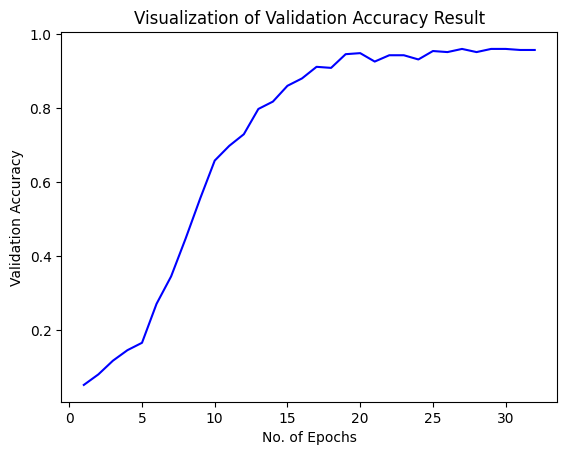

In [30]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 360 files belonging to 36 classes.


In [32]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

 1/12 [=>............................] - ETA: 25s - loss: 0.3476 - accuracy: 0.9375

2024-02-04 17:45:37.177379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/12 [=========>....................] - ETA: 1s - loss: 0.1411 - accuracy: 0.9688

2024-02-04 17:45:37.605233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/12 [==============================] - 3s 66ms/step - loss: 0.4513 - accuracy: 0.9583
Test accuracy: 0.9583333134651184


In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 360 files belonging to 36 classes.


In [34]:
cnn = tf.keras.models.load_model('trained_model.h5')

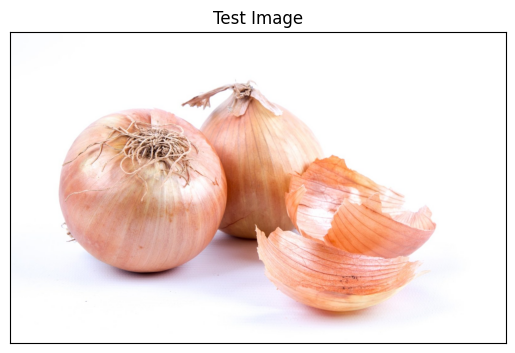

In [35]:
#Test Image Visualization
import cv2
import numpy as np

image_path = 'data/test/onion/Image_6.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 62ms/step


In [37]:
print(predictions)

[[1.2422613e-02 3.1452478e-04 1.4529006e-02 9.1538258e-04 7.7182580e-05
  1.8531283e-03 1.9069534e-03 2.0723408e-03 4.5824968e-04 1.8444925e-03
  1.1146814e-04 1.1776719e-04 4.3411106e-02 2.0363303e-01 5.4934400e-04
  9.7585790e-04 3.6765149e-04 1.1845891e-03 3.4040280e-05 1.2404707e-03
  5.9932011e-01 1.8607709e-03 2.8911796e-03 3.6127065e-04 1.4486446e-05
  2.9402753e-02 2.4693768e-02 8.1189293e-03 1.7649762e-02 8.5160537e-03
  8.3694009e-05 1.4787833e-03 9.3109151e-03 1.6499184e-03 6.3486025e-03
  2.7981523e-04]]


In [38]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


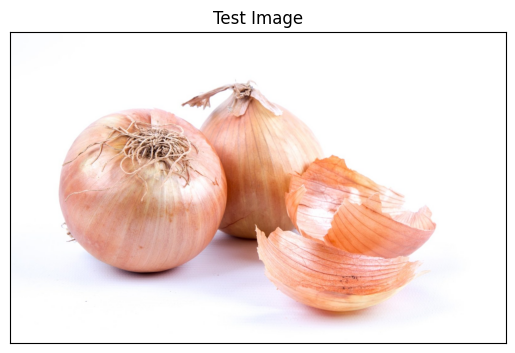

In [39]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [49]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a onion


In [ ]:
import cv2
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import img_to_array
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from gtts import gTTS
from playsound import playsound



cnn = tf.keras.models.load_model('trained_model.h5')

class_names = ['apple', 'banana','beetroot','bell pepper','cabbage','capsicum','carrot','cauliflower',
               'chilli pepper','corn','cucumber','eggplant','garlic','ginger','grapes','jalapeno',
               'kiwi','lemon','lettuce','mango','onion','orange','paprika','pear','peas','pineapple','pomegranate',
               'potato','raddish','soy beans','spinach','sweetpotato','sweetcorn','turnip','tomato','watermelon']
def predict_vegetable(frame):
    # Resize the frame to match the model input size
    resized_frame = cv2.resize(frame, (64, 64))

    # Convert the frame to RGB (as the model is trained on RGB images)
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Normalize the image and add an extra dimension for batch size
    input_arr = img_to_array(rgb_frame) / 255.0
    input_arr = np.expand_dims(input_arr, axis=0)

    # Make predictions
    predictions = cnn.predict(input_arr)

    # Get the index of the predicted class
    result_index = np.argmax(predictions)

    # Get the predicted class name
    vegetable_name = class_names[result_index]

    return vegetable_name
    
# Load CSV data with object densities
# Assuming the CSV file has columns: 'Name', 'Density'
density_data = pd.read_csv('sabzi_density.csv')


video = cv2.VideoCapture(0)  # 0 represents the default camera, you can change it if you have multiple cameras

lower_color = (0, 100, 100)
upper_color = (20, 255, 255)

while True:
    ret, frame = video.read()
    bbox, label, conf = cv.detect_common_objects(frame)
    output_image = draw_bbox(frame, bbox, label, conf)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_color, upper_color)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        dimensions_text = f'Dimensions: {w} x {h} pixels'
        cv2.putText(frame,dimensions_text, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 1.0, (0, 255, 0), 2)

    object_name = 'Apple'  # Replace with actual object name or identifier
    density = density_data[density_data['name'] == object_name]['density'].values
    if density:
        weight = density * (w * h)  # Assuming uniform density throughout the object
#             weight_text = f'Weight: {weight[0]:.2f} grams'
        dimensions_text = f'Dimensions: {w} x {h} pixels, Weight: {weight[0]:.2f}'
        cv2.putText(frame, dimensions_text, (x, y - 30), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)
    
    #cv2.putText(frame,str(fps),(10,100),cv2.FONT_HERSHEY_SIMPLEX,1,(2,255,0),1,cv2.LINE_AA)
        
    if ret is True:
        vegetable_name = predict_vegetable(frame)
        #cv2.rectangle(frame, (50, 50), (150, 150), (0, 255, 0), 2)
        #cv2.putText(frame, vegetable_name, (x, y - 70), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 255, 0), 2)

        cv2.imshow("Vegetable Detection",frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

1/1 [==============================] - 0s 9ms/step
